In [3]:
import pandas as pd
df = pd.read_csv('../datasets/real_estate_data.csv', sep = '\t')

In [5]:
# Проверка данных на наполненность
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [1]:
# Проверка на наличие дубликатов
df = df.drop_duplicates()

NameError: name 'df' is not defined

In [ ]:
df.drop_duplicates(subset = 'total_images')

In [9]:
# переводим столбец с датой из str в datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [14]:
# Выбросы
# Чтобы определить выбросы, можно визуализировать данные с помощью библиотеки seaborn
import seaborn as sns

<Axes: ylabel='ceiling_height'>

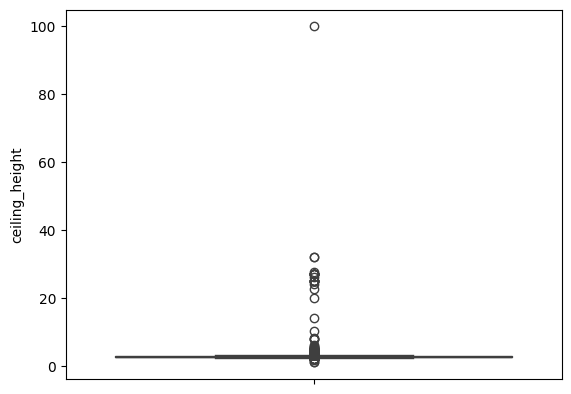

In [16]:
sns.boxplot(df['ceiling_height']) # graph all the rows from the column
# We see that there are some inconsistent data in the column e.g. value = 100

<Axes: xlabel='ceiling_height'>

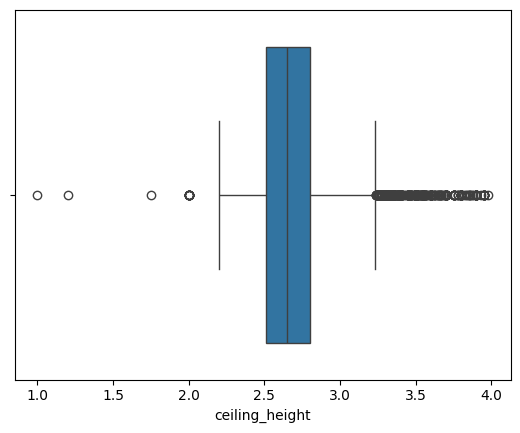

In [21]:
# Let's filter the results
var = 4
sns.boxplot(x = df.query(f'ceiling_height < {var}')['ceiling_height']) # limits the axis by var value

In [22]:
df['ceiling_height'].mean() # taking mean of all values, even the incorrect ones

2.77149889685604

In [24]:
df.query('ceiling_height < 4')['ceiling_height'].mean() # taking mean only in selected range

2.717242529534399

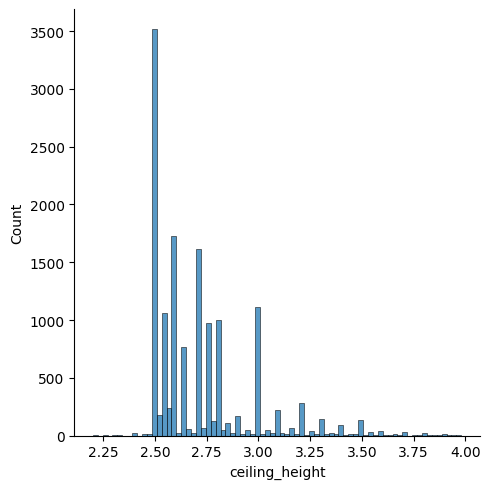

In [27]:
# we can see that most of values are concentrated between 2.5 and 3.5
sns.displot(df.query('ceiling_height < 4 and ceiling_height > 2')['ceiling_height'])